In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lets load the Boston House Pricing Dataset

In [2]:
boston=pd.read_csv('boston.csv')

In [3]:
boston.head()

Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO       B  LSTAT  Price  
0  296.0     15.3  396.90   4.98   24.0  
1  242.0     17.8  396.90   9.14   21.6  
2  242.0     17.8  392.83   4.03   34.7  
3  222.0     18.7  394.63   2.94   33.4  
4  222.0     18.7  396.90   5.33   36.2

# Prepare Datset and Basic Analysis

In [4]:
boston = boston.drop(columns=['Unnamed: 0'])

In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
#Summarizing stats of dataset
boston.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       Price  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [7]:
#Checking the missing values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

# Analyzing the correlated features

In [8]:
boston.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
Price   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     Price  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
Price    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

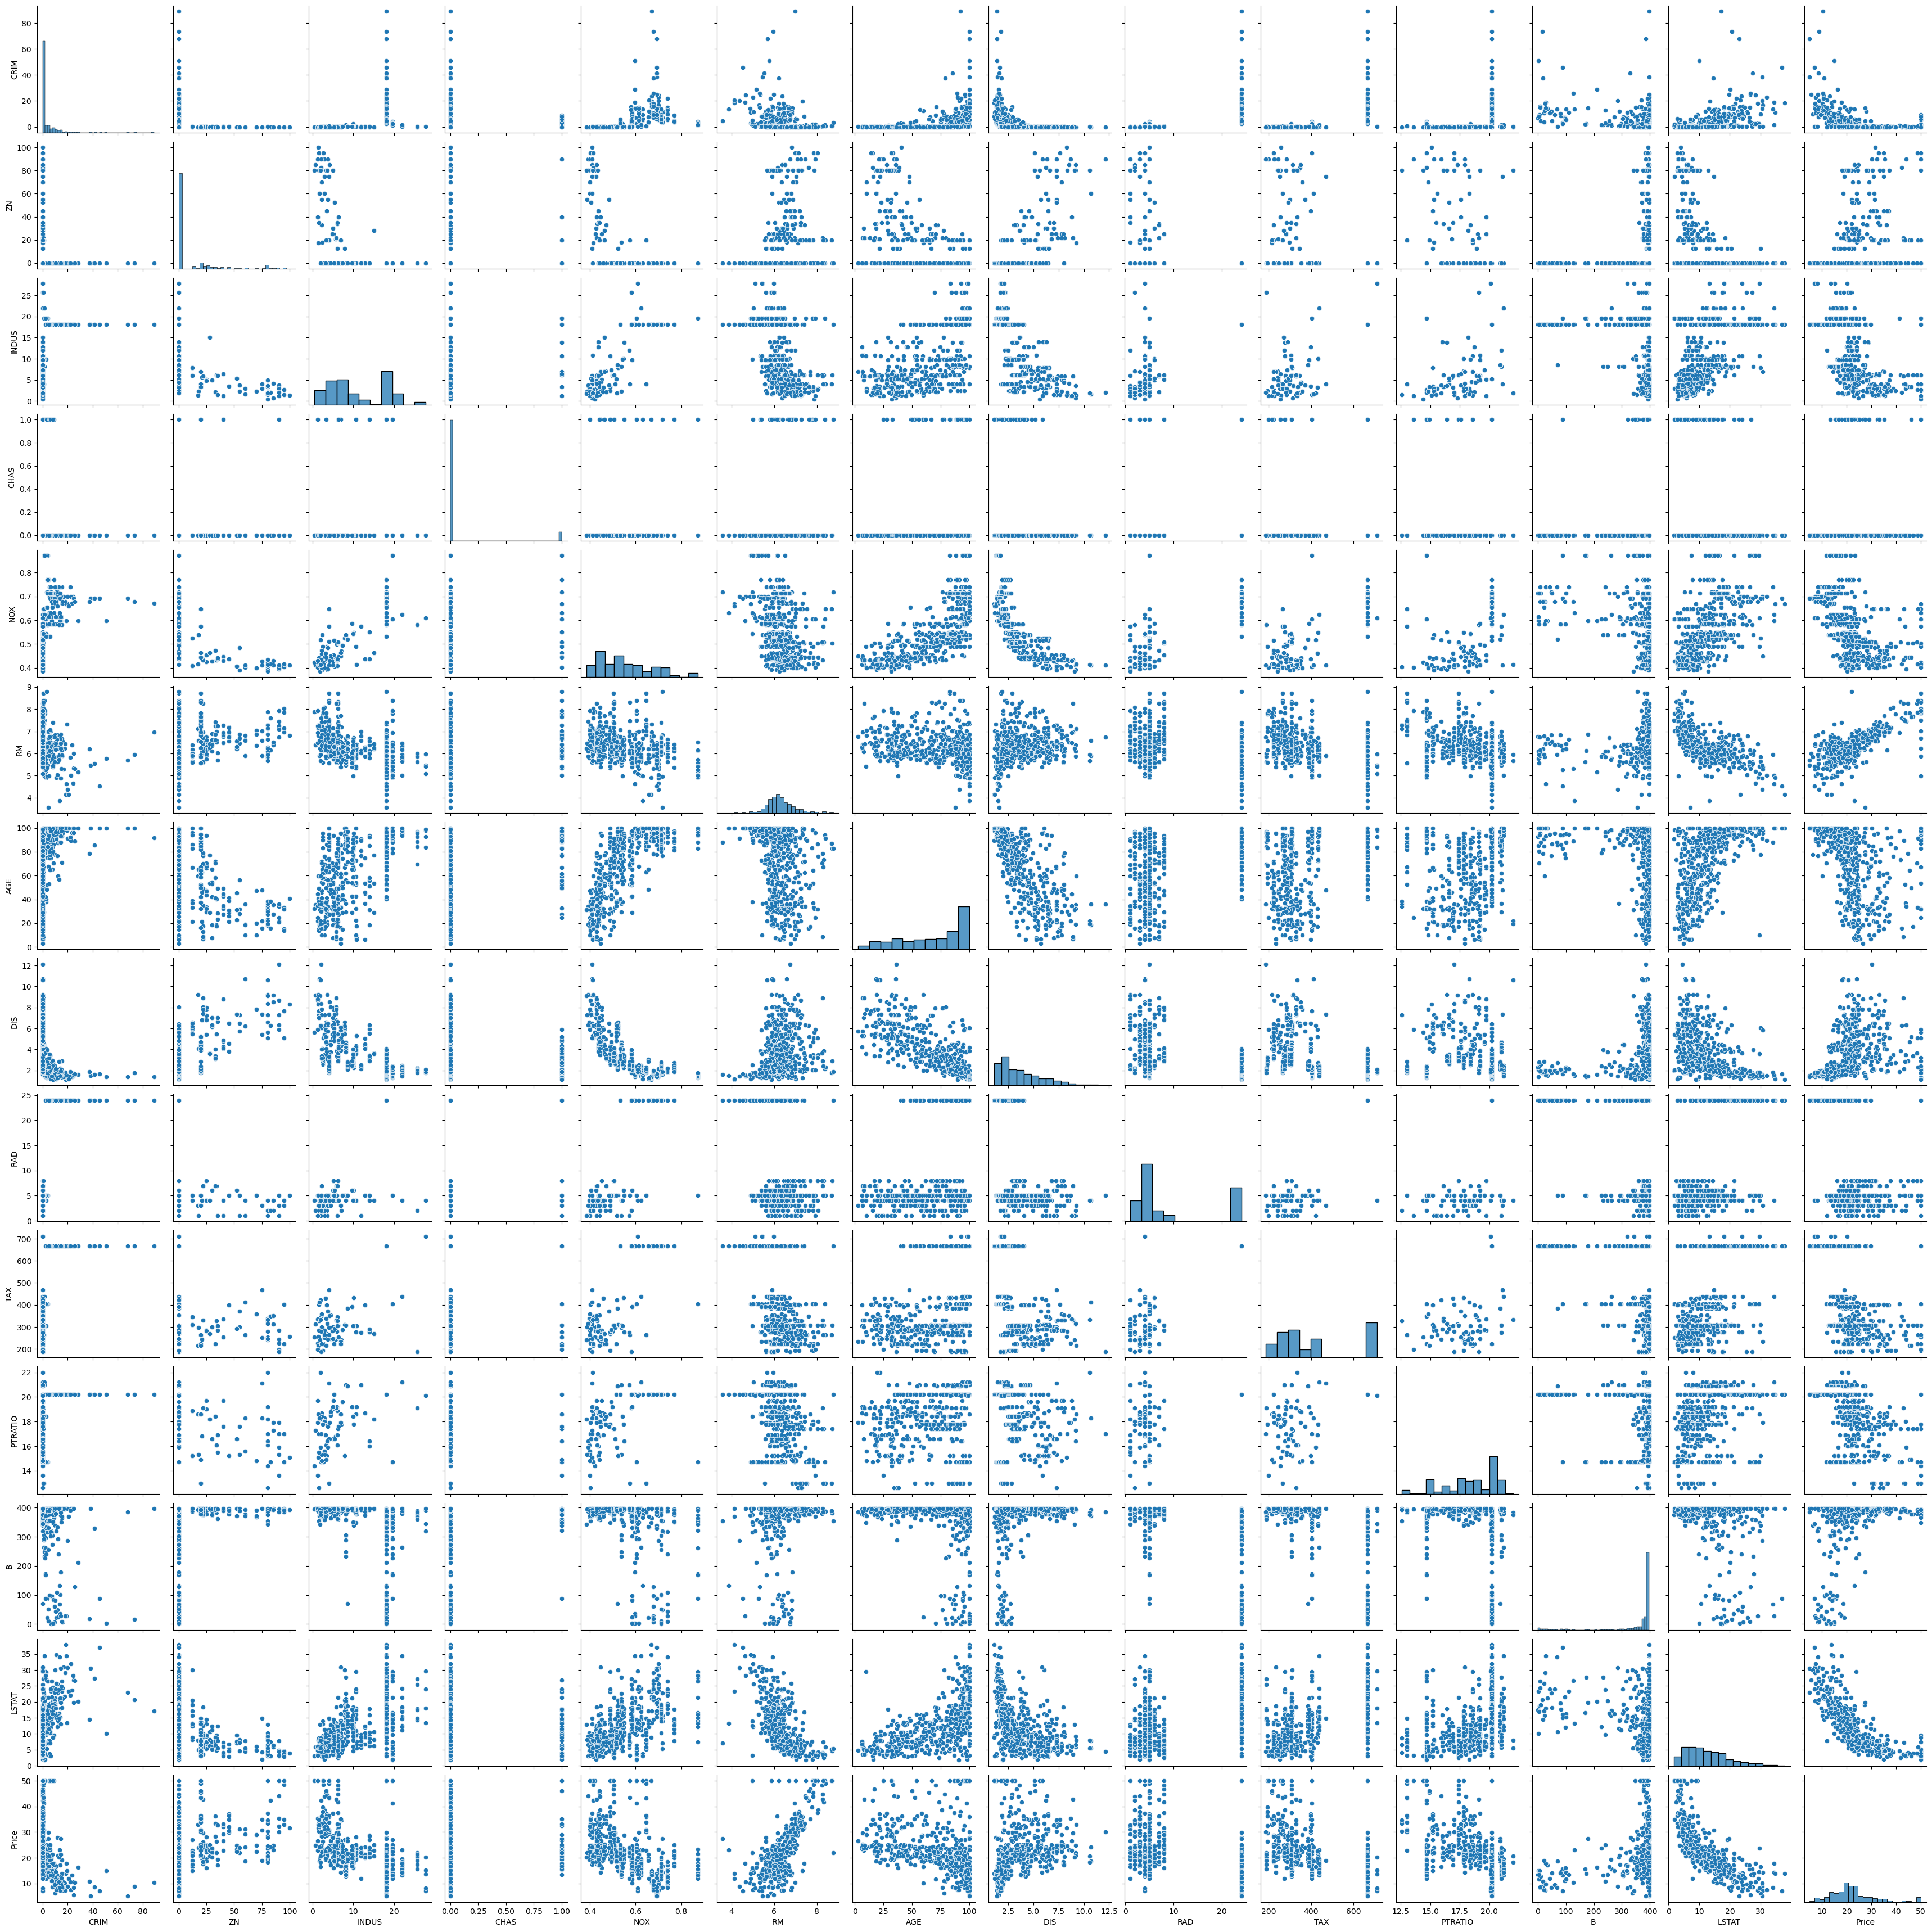

In [9]:
import seaborn as sns
sns.pairplot(boston)

Text(0, 0.5, 'Price')

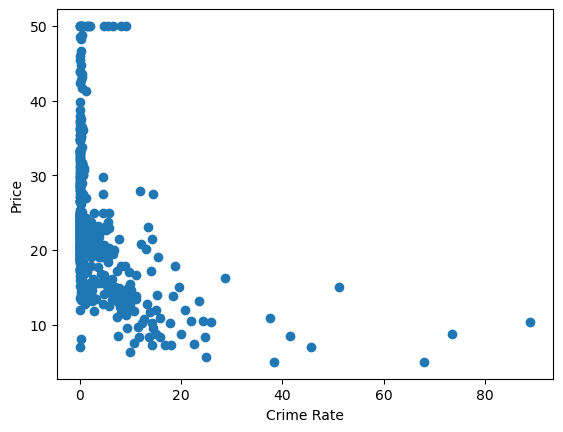

In [10]:
plt.scatter(boston['CRIM'],boston['Price'])
plt.xlabel('Crime Rate')
plt.ylabel('Price')
#AS crime rate increases price of house decreases

Text(0, 0.5, 'Price')

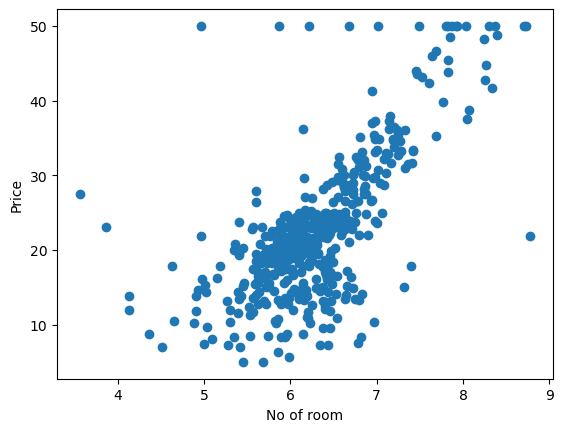

In [11]:
plt.scatter(boston['RM'],boston['Price'])
plt.xlabel('No of room')
plt.ylabel('Price')
#AS number of rooms increases price also increases

<Axes: xlabel='RM', ylabel='Price'>

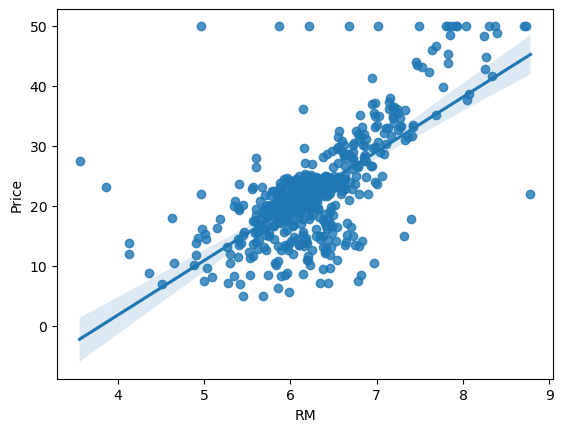

In [12]:
sns.regplot(x='RM',y='Price',data=boston)
# As Avg No of rooms increases price increases

<Axes: xlabel='LSTAT', ylabel='Price'>

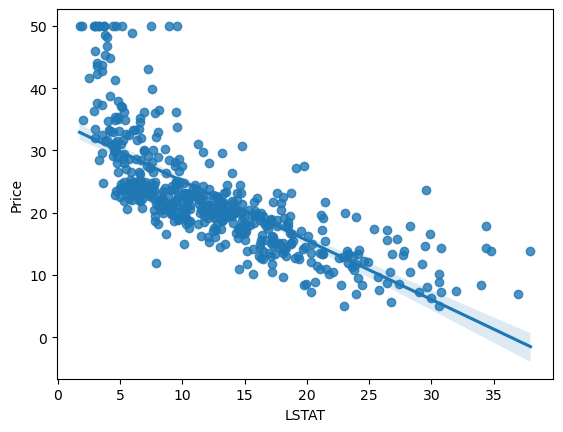

In [13]:
sns.regplot(x='LSTAT',y='Price',data=boston)
# As % lower status  is increasing Price is decreasing

<Axes: xlabel='CHAS', ylabel='Price'>

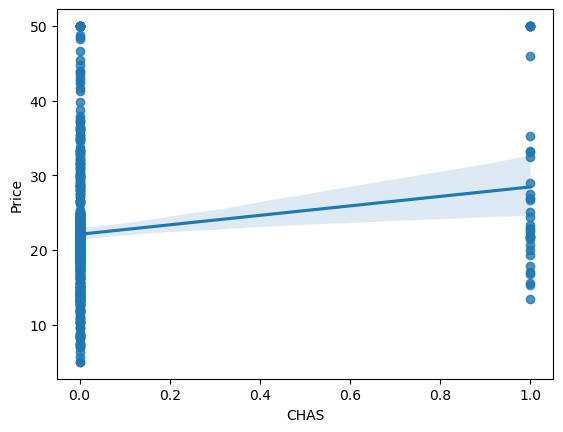

In [14]:
sns.regplot(x='CHAS',y='Price',data=boston) 
# NO correlation between house bounded by river and price

<Axes: xlabel='PTRATIO', ylabel='Price'>

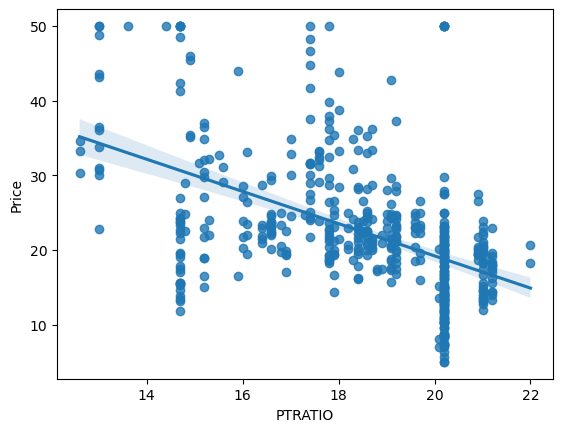

In [15]:
sns.regplot(x='PTRATIO',y='Price',data=boston)
# There is some negative correlation between price and student/teacher ratio

In [16]:
# Independent and Dependent Features
x=boston.iloc[:,:-1]
y= boston.iloc[:,-1]

In [17]:
x.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [18]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [19]:
#Train Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x.values,y.values,test_size=0.3,random_state=42)

In [20]:
x_train

array([[2.98500e-02, 0.00000e+00, 2.18000e+00, ..., 1.87000e+01,
        3.94120e+02, 5.21000e+00],
       [1.31580e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.93300e+02, 1.20400e+01],
       [1.71420e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.96900e+02, 1.02100e+01],
       ...,
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [1.11604e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [2.28760e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        7.08000e+01, 1.06300e+01]], shape=(354, 13))

In [21]:
y_train

array([28.7, 21.2, 19.3, 23.1, 19.1, 25. , 33.4,  5. , 29.6, 18.7, 21.7,
       23.1, 22.8, 21. , 48.8, 14.6, 16.6, 27.1, 20.1, 19.8, 21. , 41.3,
       23.2, 20.4, 18.5, 29.4, 36.4, 24.4, 11.8, 13.8, 12.3, 17.8, 33.1,
       26.7, 13.4, 14.4, 50. , 22. , 19.9, 23.8, 17.5, 12.7,  5.6, 31.1,
       26.2, 19.4, 16.7, 13.8, 22.9, 15.3, 27.5, 36.1, 22.9, 24.5, 25. ,
       50. , 34.9, 31.7, 24.1, 22.1, 14.1, 42.8, 19.3, 32.2, 26.4, 21.8,
       21.7,  8.3, 46.7, 43.1, 31.5, 10.5, 16.7, 20. , 33.3, 17.8, 50. ,
       20.5, 23.2, 13.1, 19.6, 22.8, 28.7, 30.7, 22.9, 21.9, 23.9, 32.7,
       24.3, 21.5, 24.6,  8.5, 26.4, 23.1, 15. ,  8.8, 19.3, 23.9, 24.7,
       19.8, 23.8, 13.3, 29. , 27.1, 34.6, 13.3, 15.6, 12.5, 14.6, 11. ,
       24.8, 17.3,  8.1, 21.4, 15.6, 23.3, 32. , 38.7, 30.1, 20.5, 32.5,
       42.3, 24.3, 20.6, 22. , 18.2, 15. ,  6.3, 20.1, 21.4, 28.4, 30.1,
       20.8, 23. , 14.3, 11.7, 37.3, 17.1, 10.4, 23. , 22.7, 20.3, 21.7,
       50. ,  8.4, 18.8, 37.2, 16.1, 16.5, 22.2, 20

In [22]:
x_test

array([[9.17800e-02, 0.00000e+00, 4.05000e+00, ..., 1.66000e+01,
        3.95500e+02, 9.04000e+00],
       [5.64400e-02, 4.00000e+01, 6.41000e+00, ..., 1.76000e+01,
        3.96900e+02, 3.53000e+00],
       [1.05740e-01, 0.00000e+00, 2.77400e+01, ..., 2.01000e+01,
        3.90110e+02, 1.80700e+01],
       ...,
       [5.26930e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.82000e+02, 4.63000e+00],
       [5.58107e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.00190e+02, 1.62200e+01],
       [9.92485e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.88520e+02, 1.64400e+01]], shape=(152, 13))

In [23]:
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4, 12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,
        8.7, 27.5, 20.7, 36.2, 31.6, 11.7, 39.8, 13.9, 21.8, 23.7, 17.6,
       24.4,  8.8, 19.2, 25.3, 20.4, 23.1, 37.9, 15.6, 45.4, 15.7, 22.6,
       14.5, 18.7, 17.8, 16.1, 20.6, 31.6, 29.1, 15.6, 17.5, 22.5, 19.4,
       19.3,  8.5, 20.6, 17. , 17.1, 14.5, 50. , 14

In [24]:
# Standardize the dataset
# kyu->internal gradient decent use hota hai aur goal hai global minima jiske liye sare features ke unit same scale me hona chahiye
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
#fit->training data ka mean ,std niklega
#transform -> training data es mean ,standard deviation ke basis par scale hoga
x_train=scaler.fit_transform(x_train)

In [26]:
# Yaha sirf transform hoga kyuki training data ka jo mean , std hai uske basis par scale hoga data naki testing data ke mean,std se
x_test=scaler.transform(x_test)

In [27]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [28]:
x_train

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]], shape=(354, 13))

In [29]:
x_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.74457062,
         0.41241246, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.30083661,
         0.42854113, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  0.8084984 ,
         0.35031705,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.38958342,
         0.25688594, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.98970133,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  0.8528718 ,
         0.33199949,  0.56585078]], shape=(152, 13))

# Model Training

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
regression=LinearRegression()

In [32]:
regression.fit(x_train,y_train)

LinearRegression()

In [33]:
#Print the coefficients and intercept
print(regression.coef_)
#coefficient->They show how much the target variable changes when that feature changes by 1 unit

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [34]:
print(regression.intercept_)
#intercept->This is the value of y when all features (x₁, x₂, ..., xₙ) = 0.->>base value of algorithm

23.01581920903956


In [35]:
regression.get_params()
#ON which paramenter model has been trained

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

In [36]:
#Prediction on test data
reg_pred=regression.predict(x_test)

In [37]:
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

## Assumptions

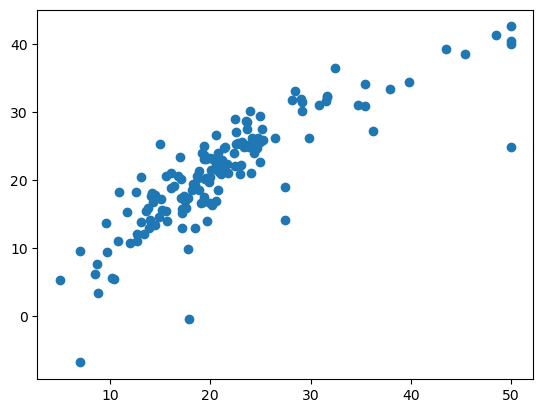

In [38]:
#Lets plot scatter plot for prediction
plt.scatter(y_test,reg_pred)

In [39]:
#Residuals-Error
residual=y_test-reg_pred

In [40]:
residual

array([-5.04896005e+00, -4.09501384e+00, -1.81119320e+00, -2.60321303e+00,
       -2.75527988e+00, -3.14668944e+00,  4.07875902e-01, -7.85989900e-02,
       -3.43692679e+00, -3.79943345e+00, -3.32286159e+00,  3.69429511e-01,
        1.38654353e+01, -6.01723342e-01, -7.25711772e-01,  3.60808015e+00,
       -1.47733882e+00,  4.58403568e+00,  9.55112026e+00, -3.47695918e+00,
       -2.24319095e+00, -1.07159640e+00,  1.75944177e+00, -1.62083139e+00,
       -3.87693812e+00, -2.13474800e+00, -2.82614028e+00,  3.39478578e-01,
       -6.34825436e-01, -1.02576270e+00,  9.34350267e-01, -1.39476081e+00,
       -1.03137247e+01,  2.28654975e+00,  2.47767140e+00,  1.89731495e+00,
        3.75007009e+00, -6.92017524e-01,  4.95595692e-01, -1.46975466e+00,
        5.76232124e+00, -3.62504715e+00,  7.43021204e+00, -2.23238054e-01,
       -4.41963242e+00, -2.09006621e+00, -7.05940057e-01, -1.90356557e+00,
       -4.15161178e-01, -6.08649576e+00, -2.41240530e+00,  1.24260398e+00,
       -4.04449810e-01,  

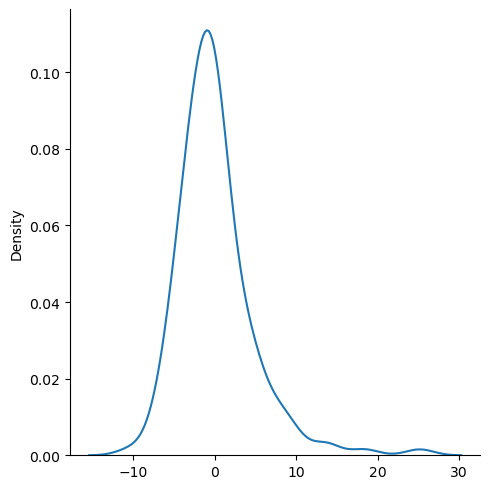

In [41]:
# Plot residuals
sns.displot(residual,kind='kde')

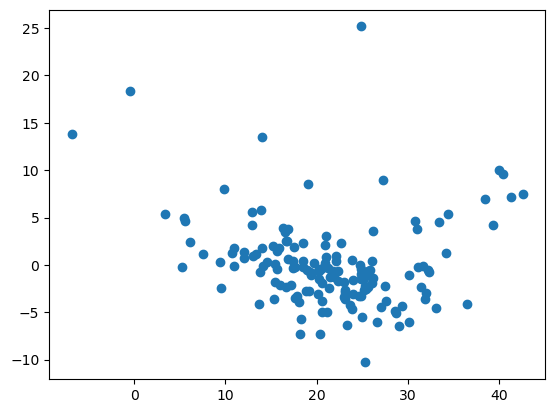

In [42]:
# Scatter plot with respect to prediction and residuals
#Uniformly Distributed
plt.scatter(reg_pred,residual)

In [43]:
#Performance Matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

In [44]:
print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.1627098714574053
21.51744423117721
4.6386899261728205


## R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [45]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.7112260057484932


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [46]:
#Display Adjusted R2
adjusted_score=1-((1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print(adjusted_score)

0.6840226584639308


# New Data Prediction

In [47]:
boston.iloc[0,:-1].values.reshape(1,-1).shape

(1, 13)

In [48]:
scaler.transform(boston.iloc[0,:-1].values.reshape(1,-1))

array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [49]:
regression.predict(scaler.transform(boston.iloc[0,:-1].values.reshape(1,-1)))

array([30.08649576])

# Pickling the model file for Deployement

In [50]:
import pickle

In [51]:
pickle.dump(regression,open('regression.pkl','wb'))

In [52]:
pickle_model=pickle.load(open('regression.pkl','rb'))

In [53]:
pickle_model.predict(scaler.transform(boston.iloc[0,:-1].values.reshape(1,-1)))

array([30.08649576])